Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Kats Seasonality Detection

* Kats General
  * `TimeSeriesData` params and methods: https://facebookresearch.github.io/Kats/api/kats.consts.html#kats.consts.TimeSeriesData
* Kats Seasonality Detector: https://facebookresearch.github.io/Kats/api/kats.detectors.seasonality.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from imp import reload
from datetime import datetime, timedelta
import sys
sys.path.append("../")

from kats.consts import TimeSeriesData
from kats.detectors.seasonality import FFTDetector, ACFDetector

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_ts(ts, label, title):
    plt.figure(figsize=(20,3))
    fig = plt.plot(ts, label=label, color='blue')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Load Data

There are 3 ts data to check the seasonality:
* Daily Sales
* Hourly Humidity
* Hourly Tenperature

In [3]:
ts_df = pd.read_pickle('../../crystal_ball/data_collector/structured_data/sales_ts.pkl')
print(ts_df.shape)

ts_df.head()

(942, 1)


,Daily_Sales
Date,
2013-01-01,58165
2013-01-02,4822042
2013-01-03,4415571
2013-01-04,4587035
2013-01-05,4078281


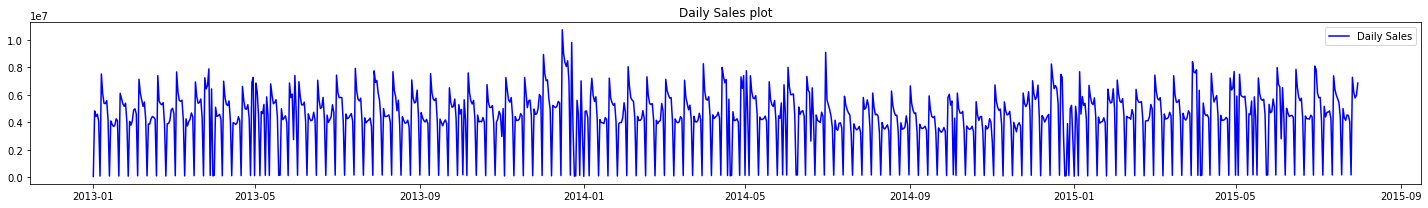

In [4]:
plot_ts(ts_df, label='Daily Sales', title='Daily Sales plot')

In [5]:
mul_ts_df = pd.read_pickle('../../crystal_ball/data_collector/structured_data/multivar_ts.pkl')

print(mul_ts_df.shape)
mul_ts_df.head()

(8143, 6)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


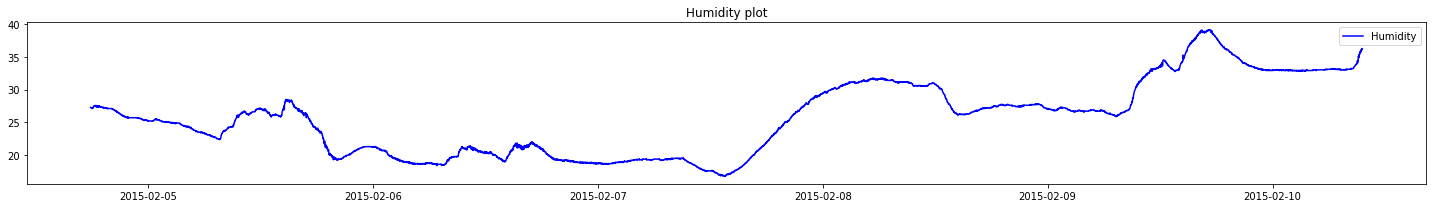

In [6]:
plot_ts(mul_ts_df['Humidity'], label='Humidity', title='Humidity plot')

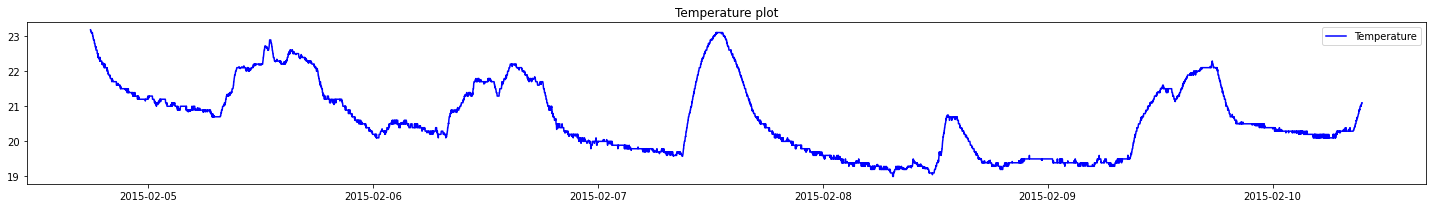

In [7]:
plot_ts(mul_ts_df['Temperature'], label='Temperature', title='Temperature plot')

In [8]:
kats_ts_sales = TimeSeriesData(ts_df.reset_index().rename(index=str, columns={'Date': 'time'}))
print(len(kats_ts_sales))

kats_ts_humidity = TimeSeriesData(mul_ts_df[['Humidity']].reset_index().rename(index=str, columns={'date': 'time'}))
print(len(kats_ts_humidity))

kats_ts_temp = TimeSeriesData(mul_ts_df[['Temperature']].reset_index().rename(index=str, columns={'date': 'time'}))
print(len(kats_ts_temp))

942
8143
8143


## Detect Seasonality

### Daily Sales Seasonality

<AxesSubplot:title={'center':'Autocorrelation'}>

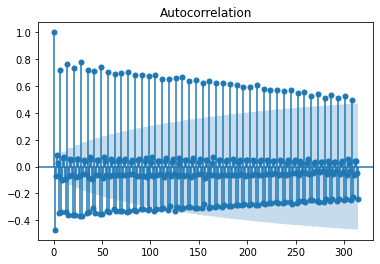

In [9]:
acf_detector = ACFDetector(kats_ts_sales)
acf_seasonality = acf_detector.detector()
acf_detector.plot()

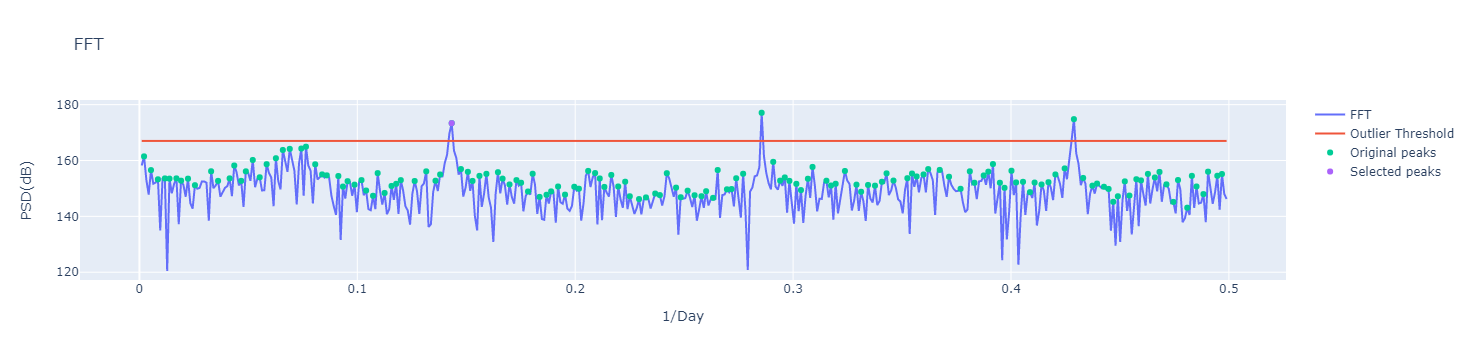

In [15]:
fft_detector = FFTDetector(kats_ts_sales)
fft_seasonality = fft_detector.detector()
fft_detector.plot(time_unit='Day')

### Himidity Seasonality

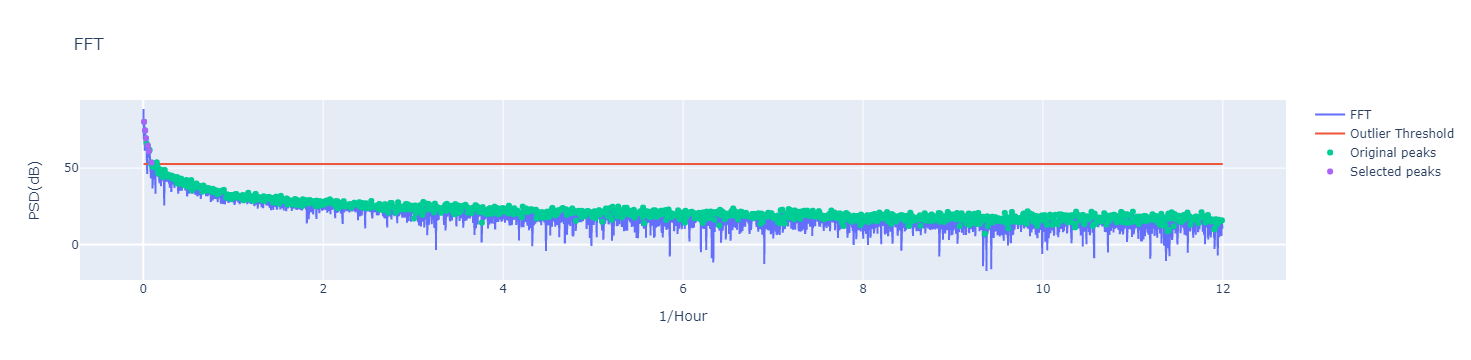

In [16]:
fft_detector = FFTDetector(kats_ts_humidity)
fft_seasonality = fft_detector.detector()
fft_detector.plot(time_unit='Hour', sample_spacing=24)

### Temperature Seasonlity

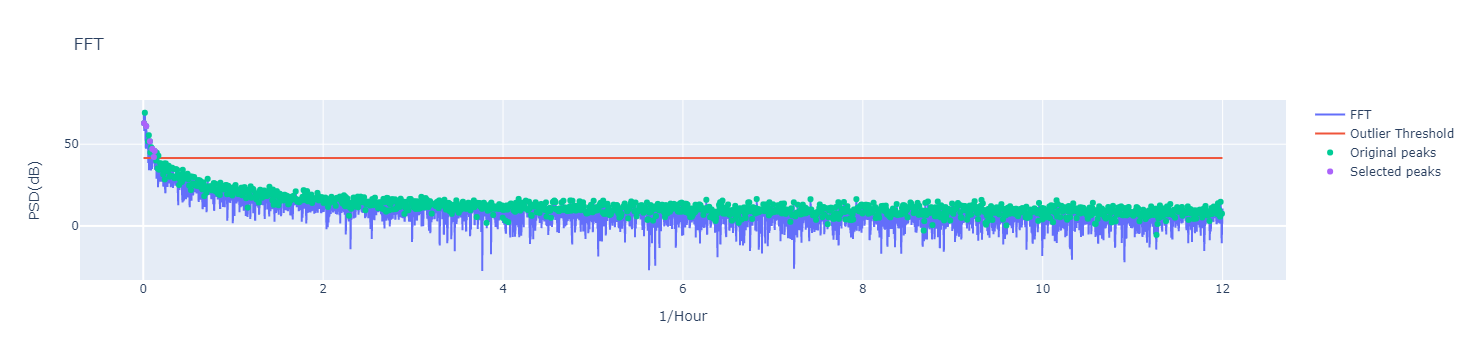

In [19]:
fft_detector = FFTDetector(kats_ts_temp)
fft_seasonality = fft_detector.detector()
fft_detector.plot(time_unit='Hour', sample_spacing=24)